In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
# from ipywidgets import interact, IntSlider, FloatSlider, fixed
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel

In [2]:
%matplotlib inline

In [3]:
plt.style.use('court.mplstyle')

In [4]:
highmass_rc_newvals = pd.read_csv('../datatables/highmass_rc_newvals.csv')
highmass_rc_newvals

,KIC,numax,pysyd_numax,e_pysyd_numax,new_numax,smooth_numax,Delnu,pysyd_dnu,e_pysyd_dnu,o_Teff,...,Teff_e_adopt,log(g)_adopt,log(g)_e_adopt,feh_adopt,feh_e_adopt,adopt_flag,adopt_flag_int,suppressed_flag,dPi,epsilon
0,3347458,39.99,40.291621,0.904390,40.32,41.422682,3.360,3.362861,0.016179,5000,...,84.000000,2.5250,0.039000,0.1650,0.007000,apogee,1,0.0,NaN,0.89
1,8378545,48.82,47.769061,1.989659,48.07,48.952072,3.952,3.966159,0.022203,5058,...,43.591857,2.9515,0.118829,0.2400,0.086673,avg,0,1.0,NaN,0.87
2,5978324,49.10,48.776551,0.974408,48.78,50.072904,4.024,4.072667,0.016443,5051,...,92.000000,2.7010,0.050000,-0.0980,0.008000,apogee,1,2.0,NaN,0.86
3,10068490,66.42,58.662513,1.977989,58.84,60.906533,5.206,5.239133,0.046630,5189,...,51.090728,2.7340,0.127322,-0.2085,0.093675,avg,0,1.0,NaN,0.87
4,4756133,80.81,80.362852,2.357250,80.29,83.967767,5.865,5.998605,0.022750,5152,...,95.000000,3.0140,0.056000,0.0910,0.008000,apogee,1,2.0,NaN,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,10162765,88.56,85.502602,2.118024,85.53,89.092562,6.760,6.801791,0.023959,4948,...,46.560283,2.9160,0.095395,0.0805,0.067201,avg,0,2.0,NaN,0.96
111,3430048,35.82,33.626875,2.147042,33.63,37.856607,3.487,3.518327,0.034631,5079,...,84.000000,2.5020,0.039000,0.1060,0.007000,apogee,1,0.0,309.0,1.00
112,7116721,50.86,50.988298,1.581224,50.97,53.768334,4.522,4.514956,0.013743,5028,...,26.510000,2.6770,0.044000,0.0490,0.025000,lamost,2,2.0,NaN,0.94
113,7347076,90.59,90.713242,1.757715,90.65,94.236618,7.216,7.217619,0.034534,5386,...,46.210000,2.9150,0.076000,-0.0070,0.044000,lamost,2,0.0,204.5,1.11


In [5]:
highmass_rc = pd.read_csv('../datatables/highmass_rc_werr.csv')
highmass_rc

,KIC,Kpmag,QLen,DLen,numax,e_numax,Delnu,e_Delnu,A,Width,...,e_RGBcorR,ClcorM,e_ClcorM,ClcorR,e_ClcorR,Phase,M17,Simbad,_RA,_DE
0,3347458,10.30,17,1235.8,39.99,1.77,3.360,0.020,39.7,17.4,...,1.05,5.24,0.78,20.87,1.06,2,M17,Simbad,292.77283,38.432480
1,8378545,11.78,17,1235.5,48.82,4.01,3.977,0.040,23.0,22.9,...,1.57,4.90,1.24,18.21,1.57,2,M17,Simbad,296.26709,44.371861
2,5978324,10.96,18,1318.1,49.10,0.80,4.074,0.023,23.5,17.6,...,0.45,4.70,0.33,17.78,0.46,2,M17,Simbad,296.65195,41.222080
3,10068490,12.26,18,1317.7,66.42,5.52,5.206,0.076,13.7,19.1,...,1.32,4.61,1.20,15.04,1.35,2,M17,Simbad,289.05295,47.040981
4,4756133,10.58,14,974.9,80.81,2.22,5.994,0.030,19.9,31.3,...,0.45,4.51,0.43,13.51,0.45,2,M17,Simbad,294.38312,39.844940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,10162765,11.12,15,1055.8,88.56,1.62,6.795,0.032,21.1,33.4,...,0.29,3.02,0.23,10.67,0.29,2,M17,Simbad,298.81076,47.142471
111,3430048,12.06,8,557.6,35.82,1.05,3.487,0.095,62.5,17.1,...,1.09,3.01,0.45,16.64,1.08,2,M17,Simbad,287.31088,38.598862
112,7116721,13.38,18,1317.9,50.86,1.45,4.522,0.017,48.4,20.8,...,0.49,3.01,0.31,14.00,0.50,2,M17,Simbad,291.45297,42.617050
113,7347076,13.66,17,1308.5,90.59,2.34,7.216,0.045,23.6,25.8,...,0.37,3.01,0.30,10.32,0.37,2,M17,Simbad,286.28159,42.939899


In [6]:
adopted_masses = pd.read_csv('../datatables/adopted_masses.csv')
adopted_masses

,KIC,fdnu,uncorr_mass,corr_mass,corr_mass_e,adopt_flag_int
0,3347458,1.026809,4.460233,4.958121,0.370240,1
1,8378545,1.026888,3.985832,4.432115,0.565633,0
2,5978324,1.023082,3.893824,4.265973,0.289300,1
3,10068490,1.012241,2.614595,2.744987,0.297086,0
4,4756133,1.032011,3.849515,4.366603,0.407963,1
...,...,...,...,...,...,...
110,10162765,1.007006,2.709475,2.786211,0.214213,0
111,3430048,0.989388,2.147365,2.057652,0.405930,1
112,7116721,0.994479,2.726675,2.666957,0.251209,2
113,7347076,1.003947,2.558417,2.599046,0.162971,2


In [7]:
sample_mask = np.logical_and(adopted_masses['corr_mass']>3.0,highmass_rc_newvals['pysyd_numax']>20)

In [8]:
def read_star_hp(star_name,suppress_output=True,unpack=False):
    delta_nu = highmass_rc_newvals['pysyd_dnu'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    nu_max = highmass_rc_newvals['pysyd_numax'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    if suppress_output == False:
        print(star_name)
        print('delta_nu =',delta_nu)
        print('nu_max =',nu_max)
    
    lightcurve = pd.read_csv('../data/hpfiltered_LCs/KIC'+star_name[4:]+'_LC.csv')
    powerspec = pd.read_csv('../data/hpfiltered_LCs/KIC'+star_name[4:]+'_PS.csv')
    if unpack == True:
        if suppress_output == False:
            print('unpacking data frames')
        time = np.asarray(lightcurve['time'])
        flux = np.asarray(lightcurve['flux'])
        freq = np.asarray(powerspec['freq'])
        power = np.asarray(powerspec['power'])
        amp = np.asarray(powerspec['amp'])
        return delta_nu,nu_max,time,flux,freq,power,amp
    else:
        if suppress_output == False:
            print('returning dataframes')
        return delta_nu,nu_max,lightcurve,powerspec

In [9]:
def read_star_bsps(star_name,suppress_output=True,unpack=False):
    delta_nu = highmass_rc_newvals['pysyd_dnu'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    nu_max = highmass_rc_newvals['pysyd_numax'][highmass_rc_newvals['KIC']==float(star_name[4:])].values[0]
    if suppress_output == False:
        print(star_name)
        print('delta_nu =',delta_nu)
        print('nu_max =',nu_max)
    
    lightcurve = pd.read_csv('../data/hpfiltered_LCs/KIC'+star_name[4:]+'_LC.csv')
    powerspec = pd.read_csv('../data/pysyd_bsps/'+star_name[4:]+'_BSPS.txt', 
                            delimiter='\s+', names=['freq','power'])
    if unpack == True:
        if suppress_output == False:
            print('unpacking data frames')
        time = np.asarray(lightcurve['time'])
        flux = np.asarray(lightcurve['flux'])
        freq = np.asarray(powerspec['freq'])
        power = np.asarray(powerspec['power'])
        amp = np.asarray(powerspec['amp'])
        return delta_nu,nu_max,time,flux,freq,power,amp
    else:
        if suppress_output == False:
            print('returning dataframes')
        return delta_nu,nu_max,lightcurve,powerspec

# Computing the mode visibilities

$$A_{0}^{2}(n) = \delta \nu \int_{n-e_{20}}^{n+e_{03}}[p(n')-B]dn'$$
where p = power density, B = local background, $\delta \nu$ the frequency resolution   
where also $e_{12}$ = -0.22, $e_{20}$ = -0.065, $e_{03}$ = 0.17, $e_{31}$ = 0.27   
then   
$$\langle A_{\ell}^{2} \rangle = \sum_{n_{max}-2}^{n_{max}+2} A_{\ell}^{2}(n)/ \sum_{n_{max}-2}^{n_{max}+2} exp[\frac{-(\nu_{n,\ell}-\nu_{max})^2}{2\sigma^2}]$$
and the visibility is   
$$V_{\ell}^{2} = \langle A_{\ell}^{2} \rangle/\langle A_{0}^{2} \rangle$$

and you expect roughly $V_{1}^{2}$ = 1.54, $V_{2}^{2}$ = 0.58, $V_{3}^{2}$ = 0.043

also
$$n' = \nu/\Delta\nu - \epsilon(\Delta\nu)$$

In [10]:
## good test star: KIC 3120567

delta_nu,nu_max,lightcurve,powerspec = read_star_bsps('KIC 3120567',suppress_output=False)

KIC 3120567
delta_nu = 5.419966961
nu_max = 65.17183398
returning dataframes


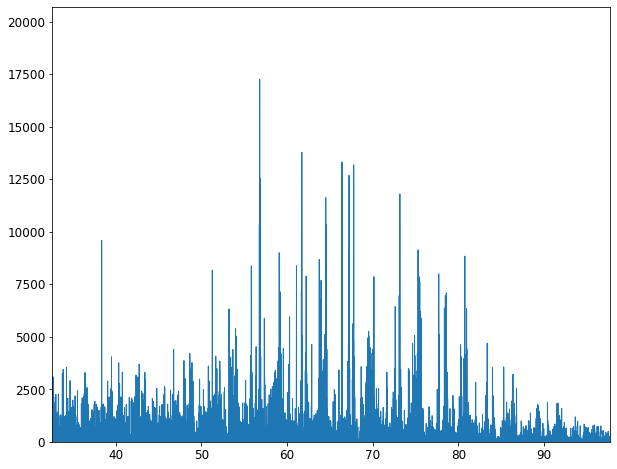

In [11]:
plt.plot(powerspec['freq'],powerspec['power'])
plt.xlim(nu_max*0.5,nu_max*1.5)
subset = powerspec['power'][(nu_max*0.8 < powerspec['freq']) & (powerspec['freq'] < nu_max*1.2)]
peak = max(subset)
plt.ylim(0,peak*1.2)
plt.show()

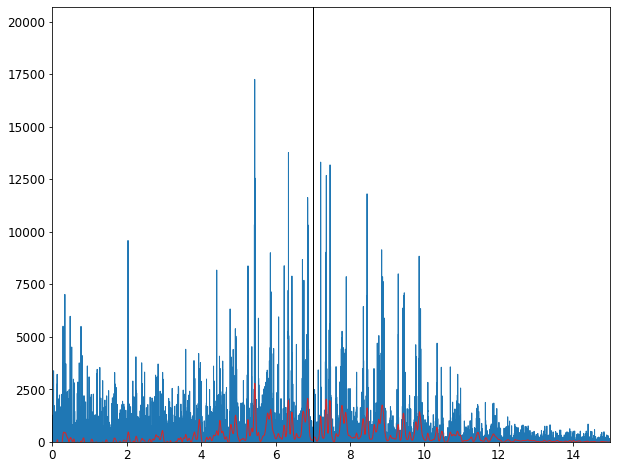

In [14]:
# ## why have you done this
n_prime = powerspec['freq']/delta_nu - highmass_rc_newvals['epsilon'][highmass_rc_newvals['KIC']==3120567].values[0]*delta_nu
freq_res = np.median(np.diff(powerspec['freq']))

plt.plot(n_prime,powerspec['power'])
plt.plot(n_prime,convolve(powerspec['power'],Gaussian1DKernel(0.02*delta_nu/freq_res)),color='tab:red')
plt.axvline(7,color='k')
# plt.xlim(nu_max*0.5,nu_max*1.5)
subset = powerspec['power'][(nu_max*0.8 < powerspec['freq']) & (powerspec['freq'] < nu_max*1.2)]
peak = max(subset)
plt.ylim(0,peak*1.2)
plt.xlim(0,15)
plt.show()

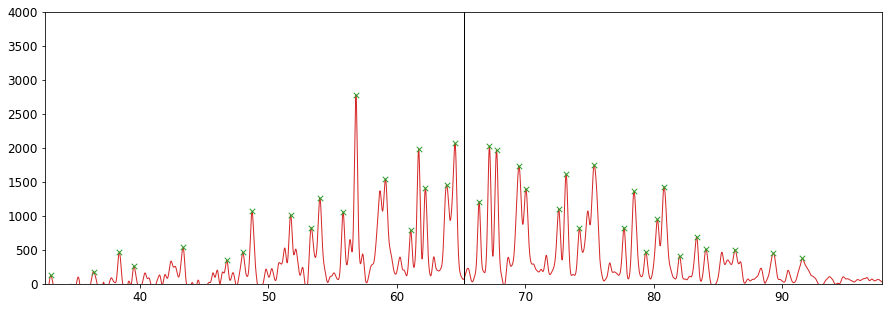

In [27]:
radial = (7 + highmass_rc_newvals['epsilon'][highmass_rc_newvals['KIC']==3120567].values[0]*delta_nu)*delta_nu

plt.figure(figsize=(15,5))
# plt.plot(powerspec['freq'],powerspec['power'])
freq_res = np.median(np.diff(powerspec['freq']))
smooth_power = convolve(powerspec['power'],Gaussian1DKernel(0.02*delta_nu/freq_res))
plt.plot(powerspec['freq'],smooth_power,color='tab:red')

peaks, _ = sp.signal.find_peaks(smooth_power,prominence=np.median(smooth_power)*250)#0.75)#prominence=10) 
found_peaks = powerspec['freq'][peaks]
plt.scatter(powerspec['freq'][peaks],smooth_power[peaks],marker='x',color='tab:green',s=30,zorder=3)

plt.axvline(radial,color='k')

plt.xlim(nu_max*0.5,nu_max*1.5)
subset = powerspec['power'][(nu_max*0.8 < powerspec['freq']) & (powerspec['freq'] < nu_max*1.2)]
peak = max(subset)
plt.ylim(0,peak*1.2)
plt.ylim(top=4000)
plt.show()

In [46]:
highmass_rc_newvals['epsilon'][highmass_rc_newvals['KIC']==3120567].values[0]

0.93